In [1]:
import pandas as pd

In [2]:
from init_modeling import generate_X
from init_modeling import regressor_performance, pickle_model


from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('Beer_merged_desc.csv')
data

,aroma_acidic,aroma_aftertaste,aroma_alcohol,aroma_anise,aroma_apple,aroma_banana,aroma_barnyard,aroma_bitter,aroma_blanket,aroma_bread,...,ethyl.pentanoate,X2.ethyl.3.methylpyrazine,esters_sum,aroma_hops_sum,acids_sum,sulfur_sum,beer_name,brand,Description,Review Summary
0,-0.541218,-0.412412,-0.827452,-0.329120,0.192017,-0.544632,-0.471512,-0.672922,-0.371184,-0.836804,...,0.014728,0.054353,-0.532630,3.696586,0.244085,0.166286,Hoegaarden sans alcool,Hoegaarden,Hoegaarden Sans Alcool (also known as Hoegaard...,NaN
1,-0.541218,-0.412412,-0.464379,-0.329120,-0.783002,-0.923886,-0.471512,-0.672922,-0.371184,0.065338,...,0.023167,0.001400,-0.465400,1.219563,-0.152160,0.098931,Palm Na 25 CL Fles,Palm,Palm N.A. 25 CL Fles is a **non-alcoholic Belg...,User ratings average **2.2/5 on Untappd** (fro...
2,-0.541218,-0.412412,-0.131391,-0.329120,-0.270465,-0.923886,-0.471512,-0.672922,-0.371184,0.002496,...,0.017571,0.000699,-0.409350,1.148974,-0.161500,-0.022940,Jupiler (Alcohol Free),Jupiler,Jupiler 0.0 (also known as Jupiler NA or Jupil...,NaN
3,-0.541218,-0.412412,-0.827452,-0.329120,-0.783002,-0.923886,-0.471512,-0.672922,-0.371184,-1.451447,...,0.016959,0.001101,-0.420080,1.416847,-0.056090,0.068372,Maes alcoholvrij bier,Maes,Maes 0.0 (also known as Maes alcoholvrij bier)...,NaN
4,-0.541218,-0.412412,-0.258170,-0.329120,-0.783002,-0.923886,-0.471512,1.841684,-0.371184,2.512305,...,0.117921,0.000492,-0.144460,0.672328,-1.204000,0.639462,Piedboeuf blonde,NaN,Piedboeuf Blond is a very low‑alcohol Belgian ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.279420,1.098919,2.139801,0.038772,-0.210766,-0.620363,-0.471512,-0.360855,-0.371184,-0.664395,...,0.014125,0.005251,1.159347,1.811254,0.737402,0.603745,Biere d'abbaye,Grimbergen,Grimbergen Triple D'Abbaye (also known as Grim...,"Users praise its **fruity, spicy, and malty fl..."
246,-0.541218,-0.412412,5.438397,-0.329120,0.160261,-0.014608,-0.421438,-0.303893,-0.371184,-0.443172,...,0.042317,0.010270,1.468011,1.775478,0.127677,1.041543,Bush Caractère,Brasserie Dubuisson,Bush Caractère from Brasserie Dubuisson is a s...,"On rating sites like Untappd (3.6/5 from ~71,0..."
247,-0.398303,0.082606,2.072782,0.152875,-0.061685,0.381765,-0.402165,-0.434424,-0.371184,1.394977,...,0.026615,0.016423,1.212790,1.780077,0.262932,1.176106,St. Bernardus Abt 12,St. Bernardus,St. Bernardus Abt 12 is a **Quadrupel (Abt/Qua...,"Users praise its **complexity, smoothness, dri..."
248,-0.541218,-0.412412,1.056188,0.928412,-0.462926,-0.508885,0.136399,-0.032898,0.822854,-0.846128,...,0.022336,0.007144,1.156272,2.216316,0.545696,0.818488,Cerveza Artesana Malheur 12 12%,NaN,Direct answer: I cannot find any beer named ex...,NaN


In [14]:
desc_cols = ['beer_name', 'brand', 'Description', 'Review Summary', 'tasting_category_fine_y']
desc_df = data[desc_cols]
desc_df


,beer_name,brand,Description,Review Summary,tasting_category_fine_y
0,Hoegaarden sans alcool,Hoegaarden,Hoegaarden Sans Alcool (also known as Hoegaard...,NaN,Low/No alcohol
1,Palm Na 25 CL Fles,Palm,Palm N.A. 25 CL Fles is a **non-alcoholic Belg...,User ratings average **2.2/5 on Untappd** (fro...,Low/No alcohol
2,Jupiler (Alcohol Free),Jupiler,Jupiler 0.0 (also known as Jupiler NA or Jupil...,NaN,Low/No alcohol
3,Maes alcoholvrij bier,Maes,Maes 0.0 (also known as Maes alcoholvrij bier)...,NaN,Low/No alcohol
4,Piedboeuf blonde,NaN,Piedboeuf Blond is a very low‑alcohol Belgian ...,NaN,Low/No alcohol
...,...,...,...,...,...
245,Biere d'abbaye,Grimbergen,Grimbergen Triple D'Abbaye (also known as Grim...,"Users praise its **fruity, spicy, and malty fl...",Strong ale
246,Bush Caractère,Brasserie Dubuisson,Bush Caractère from Brasserie Dubuisson is a s...,"On rating sites like Untappd (3.6/5 from ~71,0...",Strong ale
247,St. Bernardus Abt 12,St. Bernardus,St. Bernardus Abt 12 is a **Quadrupel (Abt/Qua...,"Users praise its **complexity, smoothness, dri...",Strong ale
248,Cerveza Artesana Malheur 12 12%,NaN,Direct answer: I cannot find any beer named ex...,NaN,Strong ale


In [5]:
feature_cols = [col for col in data.columns if col.startswith('aroma_') or col.startswith('palate_') or col.startswith('taste_')]
feature_df = data[feature_cols]
feature_df

,aroma_acidic,aroma_aftertaste,aroma_alcohol,aroma_anise,aroma_apple,aroma_banana,aroma_barnyard,aroma_bitter,aroma_blanket,aroma_bread,...,taste_resinous,taste_smoky,taste_solvent,taste_sour,taste_stale,taste_sweet,taste_toast,taste_tropical,taste_woody,aroma_hops_sum
0,-0.541218,-0.412412,-0.827452,-0.329120,0.192017,-0.544632,-0.471512,-0.672922,-0.371184,-0.836804,...,-0.328141,-0.284594,-0.343435,-0.548848,-0.571463,1.478909,-0.698196,-0.540469,-0.721040,3.696586
1,-0.541218,-0.412412,-0.464379,-0.329120,-0.783002,-0.923886,-0.471512,-0.672922,-0.371184,0.065338,...,-0.328141,-0.284594,-0.343435,-0.673420,-0.571463,1.020469,-0.698196,-0.540469,-0.721040,1.219563
2,-0.541218,-0.412412,-0.131391,-0.329120,-0.270465,-0.923886,-0.471512,-0.672922,-0.371184,0.002496,...,-0.328141,-0.284594,-0.343435,-0.595404,-0.571463,0.700821,1.772489,-0.540469,-0.721040,1.148974
3,-0.541218,-0.412412,-0.827452,-0.329120,-0.783002,-0.923886,-0.471512,-0.672922,-0.371184,-1.451447,...,-0.328141,-0.284594,-0.343435,-0.754565,-0.571463,-0.945087,-0.698196,-0.540469,-0.721040,1.416847
4,-0.541218,-0.412412,-0.258170,-0.329120,-0.783002,-0.923886,-0.471512,1.841684,-0.371184,2.512305,...,-0.328141,-0.284594,-0.343435,-0.617429,-0.571463,-0.124719,-0.698196,-0.540469,-0.721040,0.672328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.279420,1.098919,2.139801,0.038772,-0.210766,-0.620363,-0.471512,-0.360855,-0.371184,-0.664395,...,-0.328141,-0.284594,5.632481,0.070929,-0.571463,1.335468,-0.698196,-0.540469,-0.085619,1.811254
246,-0.541218,-0.412412,5.438397,-0.329120,0.160261,-0.014608,-0.421438,-0.303893,-0.371184,-0.443172,...,-0.328141,-0.284594,0.190108,-0.624169,-0.571463,0.521037,-0.698196,-0.206034,-0.342828,1.775478
247,-0.398303,0.082606,2.072782,0.152875,-0.061685,0.381765,-0.402165,-0.434424,-0.371184,1.394977,...,-0.235926,0.086921,-0.343435,-0.594839,-0.374539,-0.138139,0.018754,-0.502629,-0.258872,1.780077
248,-0.541218,-0.412412,1.056188,0.928412,-0.462926,-0.508885,0.136399,-0.032898,0.822854,-0.846128,...,0.767260,-0.284594,-0.343435,-0.445961,-0.571463,-0.350027,-0.343344,0.133768,0.956449,2.216316


In [17]:
other_cols = [col for col in data.columns if col not in desc_cols + feature_cols]
chemical_df = data[other_cols]
chemical_df

,acetaldehyde,CS2,DES,DMS,ethyl_2.methyl_butyrate,ethyl_acetate,ethyl_decanoate,ethyl_hexanoate,ethyl_isovalerate,ethyl_octanoate,...,manool.oxide,X13.epi.manool.oxide,isopropyl.hexadecanoate,manool,ethyl.octadecanoate,ethyl.pentanoate,X2.ethyl.3.methylpyrazine,esters_sum,acids_sum,sulfur_sum
0,-0.641740,-2.14629,-1.90527,0.046211,-3.19552,-0.599350,-1.97531,-2.47690,-4.48700,-2.004800,...,3.702195,4.360243,-1.817820,5.721204,4.438951,0.014728,0.054353,-0.532630,0.244085,0.166286
1,-0.174820,-2.14629,-0.25710,0.347241,-3.19552,-0.507250,-1.75597,-2.17587,-4.48700,-1.662240,...,4.133651,4.512589,4.323292,5.810501,4.247826,0.023167,0.001400,-0.465400,-0.152160,0.098931
2,0.511067,-2.14629,-1.90527,0.898604,-3.19552,-0.134510,-1.89364,-2.12960,-4.48700,-1.522520,...,3.966730,4.394267,-1.817820,5.585529,3.598293,0.017571,0.000699,-0.409350,-0.161500,-0.022940
3,0.249793,-2.14629,-1.90527,0.782126,-3.19552,-0.233870,-2.08698,-1.86870,-4.48700,-1.862800,...,3.812901,4.174304,4.088807,5.204583,4.498781,0.016959,0.001101,-0.420080,-0.056090,0.068372
4,-1.902830,-0.75699,-1.34727,0.553356,-3.19552,0.207751,-1.71309,-1.82813,-4.48700,-1.760580,...,1.618481,4.742899,4.651536,6.515499,4.789220,0.117921,0.000492,-0.144460,-1.204000,0.639462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.070147,-0.78590,-1.90527,0.938039,-3.19552,1.675585,-1.24841,-0.13426,-4.48700,-0.280010,...,3.514089,2.601403,4.059289,5.270721,6.017596,0.014125,0.005251,1.159347,0.737402,0.603745
246,0.991558,-2.14629,-0.24059,1.971083,-3.19552,1.900418,-0.34883,-0.11219,-4.48700,0.172606,...,3.747212,4.114019,-1.817820,5.353111,5.460373,0.042317,0.010270,1.468011,0.127677,1.041543
247,0.944601,-2.14629,-0.00374,2.090322,-3.19552,1.691199,-0.56339,-0.11208,-4.48700,0.057729,...,2.697194,-1.817820,-1.817820,5.162309,5.572108,0.026615,0.016423,1.212790,0.262932,1.176106
248,1.060986,-2.14629,-0.16612,1.688104,-2.10513,1.643226,-0.97277,-0.10625,-1.93312,0.018203,...,3.403020,4.196740,-1.817820,5.737120,4.953958,0.022336,0.007144,1.156272,0.545696,0.818488


In [ ]:
# Ethyl acetate
# Ethanol
# Ethyl octanoate
# Ethyl phenylacetate
# Lactic acid
# Protein

In [3]:

chem_dataset = pd.read_csv('Supplemental File S1.csv').set_index('beer')
review_panel_dataset = pd.read_csv('Supplemental File S7.csv').set_index('beer')
review_panel_dataset = review_panel_dataset.drop(columns=['beer_id', 'tasting_category_fine'])
chem_dataset_expertpanel = chem_dataset.join(review_panel_dataset)
x_name = 'chem_log'
X = generate_X(pd.concat([chem_dataset_expertpanel['beer_id'] , chem_dataset_expertpanel.loc[:,'acetaldehyde':'sulfur_sum']], axis=1), impute=True)
y_name = 'expertpanel'
Y = chem_dataset_expertpanel.loc[:,'aroma_acetaldehyde':'taste_woody']
y_class = chem_dataset_expertpanel.loc[:,'tasting_category_fine']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,
                                                    random_state=0, shuffle=True, stratify=y_class)

In [12]:
X_train.shape, Y_train.shape

((175, 231), (175, 186))

In [4]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Create the MultiOutputRegressor with a RandomForestRegressor as the base estimator
multioutput_model = MultiOutputRegressor(RandomForestRegressor(random_state=0))

# Fit the model on the training data
multioutput_model.fit(X_train, Y_train)

# Predict on the test data
Y_pred = multioutput_model.predict(X_test)

# Optionally, print the shape of predictions to verify
print("Test predictions shape:", Y_pred.shape)


ValueError: Input y contains NaN.

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:603: UserWarning: The priors do not sum to 1. Renormalizing
  warnings.warn("The priors do not sum to 1. Renormalizing", UserWarning)


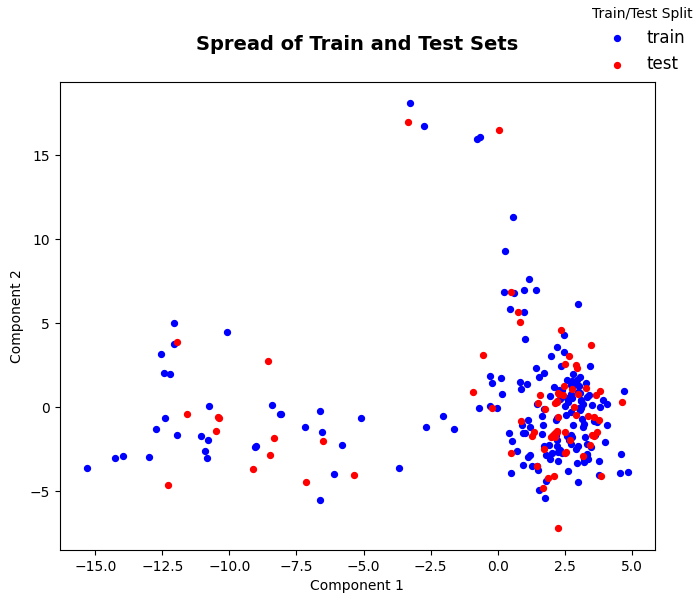

In [14]:

# Show low/no alcohol beers
def low_alcohol_spread(X, X_train, X_test, y_class, method='LDA'):
    import matplotlib.pyplot as plt
    from itertools import chain
    if method == 'PCA':
        from sklearn.decomposition import PCA
    else:
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    
    ind_train = list(chain(*[[i for i,x in enumerate(X.index) if x == a] for a in X_train.index]))
    ind_test = list(chain(*[[i for i,x in enumerate(X.index) if x == a] for a in X_test.index]))
    
    from sklearn.preprocessing import StandardScaler
    std_scale = StandardScaler()
    X = pd.DataFrame(std_scale.fit_transform(X), columns=X.columns)
        
    if method == 'PCA':
        pca = PCA(n_components=2, whiten=True)
        X_pca = pca.fit_transform(X)
        
        x = X_pca[ind_train+ind_test,0]
        y = X_pca[ind_train+ind_test,1]
    else:
        lda = LDA(n_components=2, solver='eigen', shrinkage='auto', priors=y_class.value_counts().sort_index())
        X_lda = lda.fit_transform(X, y=y_class)
    
        x = X_lda[ind_train+ind_test,0]
        y = X_lda[ind_train+ind_test,1]
    
    xlabel='Component 1'
    ylabel='Component 2'
    title='Spread of Train and Test Sets'
    classes=['train']*len(ind_train)+['test']*len(ind_test)
    unique_classes = ['train','test']
    legends_name='Train/Test Split'
    colors = ['blue','red']
        
    fig, ax = plt.subplots(1, figsize=(7, 6))
    for i, u in enumerate(unique_classes):
        xi = [x[j] for j  in range(len(x)) if classes[j] == u]
        yi = [y[j] for j  in range(len(x)) if classes[j] == u]
        plt.scatter(xi, yi, s=18, label=str(u), color=colors[i])
    ax.set_position([0.1,0.1,0.85,0.78])  #left, bottom, width, height
    plt.title(title, fontsize=14, fontweight='bold', y=1.05)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, edgecolor='white', loc='upper right', title=legends_name, borderaxespad=0, fontsize=12, columnspacing=0.1, framealpha=0)
        
        

low_alcohol_spread(X, X_train, X_test, y_class, method='LDA')

In [10]:
Y_train

,aroma_acetaldehyde,aroma_acetate,aroma_acetic,aroma_acidic,aroma_aftertaste,aroma_alcohol,aroma_anise,aroma_apple,aroma_banana,aroma_barnyard,...,taste_pineapple,taste_resinous,taste_smoky,taste_solvent,taste_sour,taste_stale,taste_sweet,taste_toast,taste_tropical,taste_woody
beer,,,,,,,,,,,,,,,,,,,,,
233,-0.145066,-0.139059,0.012563,-0.409884,-0.412412,0.731986,-0.329120,-0.078379,-0.710714,-0.471512,...,-0.526220,-0.328141,1.363851,-0.343435,-0.549635,-0.134579,1.383092,-0.433099,-0.372569,0.760005
123,-0.145066,-0.139059,-0.308488,-0.541218,-0.412412,1.436258,2.617856,-0.783002,-0.599706,-0.471512,...,-0.526220,-0.328141,-0.284594,-0.343435,-0.655270,-0.571463,0.096130,-0.698196,-0.540469,-0.721040
168,-0.145066,-0.139059,-0.308488,0.509382,-0.412412,0.306609,-0.329120,-0.365476,-0.680277,-0.471512,...,-0.526220,-0.328141,-0.284594,-0.343435,-0.387980,-0.571463,2.262634,-0.698196,-0.540469,-0.721040
187,-0.145066,-0.139059,-0.308488,-0.057878,-0.412412,-0.044846,0.010488,-0.302783,-0.251437,-0.471512,...,-0.526220,-0.328141,-0.284594,-0.343435,-0.518239,1.155903,0.555403,2.446257,-0.208545,-0.045370
12,-0.145066,-0.139059,-0.308488,2.170736,1.544567,-0.827452,-0.329120,1.641998,-0.452259,0.515431,...,-0.232165,-0.328141,-0.284594,-0.343435,1.923846,0.348269,1.625386,-0.698196,-0.540469,1.917192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.145066,-0.139059,-0.308488,-0.541218,-0.412412,0.067364,-0.329120,-0.618280,-0.539454,-0.471512,...,0.522232,2.743115,-0.284594,-0.343435,-0.370007,-0.571463,1.306480,-0.698196,0.719804,-0.721040
174,-0.145066,-0.139059,-0.308488,-0.088670,-0.412412,-0.338954,-0.329120,-0.603152,-0.818951,-0.032332,...,-0.526220,-0.328141,-0.284594,2.560886,-0.507677,-0.571463,0.485109,0.259926,-0.540469,-0.721040
198,-0.145066,-0.139059,-0.308488,-0.406683,1.529227,0.116494,0.238047,-0.074571,0.292732,-0.406231,...,-0.440621,-0.328141,-0.284594,0.641470,-0.503393,-0.571463,0.132335,1.413755,-0.437576,-0.022872
